In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
df = pd.read_csv('https://raw.githubusercontent.com/Roman0285/skillfactory_rds/master/module_2/stud_math.xls')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В датасете числовых столбцов - 13, строковых столбцов - 17

In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Заменим название некоторых столбцов

In [4]:
df = df.rename(columns={'Pstatus': 'p_status', 'Medu': 'm_edu',
                        'Fedu': 'f_edu', 'Mjob': 'm_job', 'Fjob': 'f_job', 'studytime, granular' : 'st_granular' })

Рассмотрим столбец school

In [5]:
pd.DataFrame(df.school.value_counts())

,school
GP,349
MS,46


В датасете содержится два уникальных значения:
- GP
- MS

Вывод, что выборка для анализа сделана по ученикам из двух школ

Рассмотрим столбец sex

In [6]:
pd.DataFrame(df.sex.value_counts())

,sex
F,208
M,187


В датасете содержится два уникальных значения:

- F
- M

Вывод, что в выборке нет трансгендеров и детей, не определившихся с полом

Рассмотрим столбец age

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

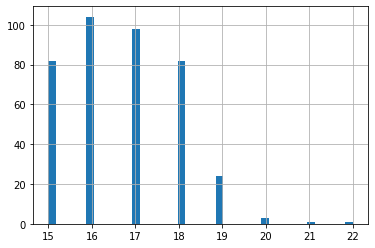

In [7]:
df.age.hist(bins = 40)
df.age.describe()

In [8]:
IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
perc25 = df.age.quantile(0.25)
perc75 = df.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


В датасете содержится восемь уникальных значений, один выброс - ученик в возрасте 22 года. По здравому смыслу и ученики с 19 до 21 года тоже лишние, но скорее всего ребята плохо учатся и оставались на второй год. Плюс в условии задания сказано рассмотреть влияние условий жизни учащихся в возрасте от 15 до 22 лет. Поэтому анализ будем проводить по всей выборке


Рассмотрим столбец address, в этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [9]:
df.address.mode()[0]

'U'

Заменим нулевые значения на моду

In [10]:
df.address = df.address.fillna(df.address.mode()[0])

In [11]:
pd.DataFrame(df.address.value_counts())

,address
U,312
R,83


В датасете информация о детях преимущественно живущих в городе ( в 3.75 раза больше)

Рассмотрим столбец famsize, в этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [12]:
df.famsize.mode()[0]

'GT3'

In [13]:
df.famsize = df.famsize.fillna(df.famsize.mode()[0])

In [14]:
pd.DataFrame(df.famsize.value_counts())

,famsize
GT3,288
LE3,107


В датасете преимущественно содержится информация о детях, живущих в многодетных семьях (в 2,7 раза больше, чем семьи с меньше чем трое детей).

Рассмотрим столбец p_status, в этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [15]:
df.p_status.mode()[0]

'T'

In [16]:
df.p_status = df.p_status.fillna(df.p_status.mode()[0])

In [17]:
pd.DataFrame(df.p_status.value_counts())

,p_status
T,359
A,36


В датасете преимущественно содержится информация о детях, живущих в полных семьях (в 10 раза больше, чем в раздельных семьях).

Рассмотрим столбец m_edu. Будем считать этот столбец категориальным признаком, несмотря на то, что он в числовом формате. В этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [18]:
df.m_edu.mode()[0]

4.0

In [19]:
df.m_edu = df.m_edu.fillna(df.m_edu.mode()[0])

In [20]:
pd.DataFrame(df.m_edu.value_counts())

,m_edu
4.0,134
2.0,102
3.0,97
1.0,59
0.0,3


Уровень образования матерей этих детей разделен приблизительно на равные части (четверть - высшее, четверть - среднее специальное или 11 классов, четверть - 5-9 классы, оставшаяся часть имеет образование 1 - 4 класса, либо без образования)

Рассмотрим столбец f_edu. Будем считать этот столбец категориальным признаком, несмотря на то, что он в числовом формате. В этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [21]:
df.f_edu.mode()[0]

2.0

In [22]:
df.f_edu = df.f_edu.fillna(df.f_edu.mode()[0])

In [23]:
pd.DataFrame(df.f_edu.value_counts())

,f_edu
2.0,130
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Уровень образования отцов ниже уровня образования матерей. Кроме того есть одно уникальное значение "40". Скорее всего это опечатка. И уровень образования "4.0". заменим "40" на "4.0"

In [24]:
def fix_f_edu(x):
    if x == 40.0:
        return 4.0
    else:
        return x

In [25]:
df.f_edu = df.f_edu.apply(fix_f_edu)

In [26]:
pd.DataFrame(df.f_edu.value_counts())

,f_edu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


Рассмотрим столбец m_job, в этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [27]:
df.m_job.mode()[0]

'other'

In [28]:
df.m_job = df.m_job.fillna(df.m_job.mode()[0])

In [29]:
pd.DataFrame(df.m_job.value_counts())

,m_job
other,152
services,98
at_home,58
teacher,55
health,32


В датасете больше всего матерей задействовано в других сферах.

Рассмотрим столбец f_job, в этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [30]:
df.f_job.mode()[0]

'other'

In [31]:
df.f_job = df.f_job.fillna(df.f_job.mode()[0])

In [32]:
pd.DataFrame(df.f_job.value_counts())

,f_job
other,233
services,102
teacher,29
at_home,16
health,15


В датасете больше всего отцов также задействовано в других сферах.

Рассмотрим столбец reason, в этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [33]:
df.reason.mode()[0]

'course'

In [34]:
df.reason = df.reason.fillna(df.reason.mode()[0])

In [35]:
pd.DataFrame(df.reason.value_counts())

,reason
course,154
home,104
reputation,103
other,34


Причины выбора школы разделились практически по ровну. Близость к дому, репутация школы, образовательная программа в равных частях.

Рассмотрим столбец guardian, в этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [36]:
df.guardian.mode()[0]

'mother'

In [37]:
df.guardian = df.guardian.fillna(df.guardian.mode()[0])

In [38]:
pd.DataFrame(df.guardian.value_counts())

,guardian
mother,281
father,86
other,28


В датасете больше всего детей, чьи опекуны матери (более чем в три раза). Однако мне кажется этот столбец противоречит со столбцом p_status.

Рассмотрим столбец traveltime. Будем считать этот столбец категориальным признаком, несмотря на то, что он в числовом формате. В этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [39]:
df.traveltime.mode()[0]

1.0

In [40]:
df.traveltime = df.traveltime.fillna(df.traveltime.mode()[0])

In [41]:
pd.DataFrame(df.traveltime.value_counts())

,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


В датасете почти 70% детей тратят меньше 15 минут на дорогу. Около 25% до 30 минут. Можно сделать вывод, что все дети живут достаточно близко от школы

Рассмотрим столбец studytime. Будем считать этот столбец категориальным признаком, несмотря на то, что он в числовом формате. В этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [42]:
df.studytime.mode()[0]

2.0

In [43]:
df.studytime = df.studytime.fillna(df.studytime.mode()[0])

In [44]:
pd.DataFrame(df.studytime.value_counts())

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


В датасете почти 50% детей тратят от 2-х до 5-ти часов на учебу. Около 25% менее 2-х часов. Возможно дети одаренные быстро схватывают, а возможно наоборот недостаточно тратят время

Рассмотрим столбец failures. Будем считать этот столбец категориальным признаком, несмотря на то, что он в числовом формате. В этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [45]:
df.failures.mode()[0]

0.0

In [46]:
df.failures = df.failures.fillna(df.failures.mode()[0])

In [47]:
pd.DataFrame(df.failures.value_counts())

,failures
0.0,315
1.0,49
2.0,16
3.0,15


В датасете почти 80% детей не выполняют внеучебные неудачи. 

Рассмотрим столбец schoolsup, в этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [48]:
df.schoolsup.mode()[0]

'no'

In [49]:
df.schoolsup = df.schoolsup.fillna(df.schoolsup.mode()[0])

In [50]:
pd.DataFrame(df.schoolsup.value_counts())

,schoolsup
no,344
yes,51


В датасете очень маленькая часть детей использует дополнительную образовательную поддержку

Рассмотрим столбец famsup, в этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [51]:
df.famsup.mode()[0]

'yes'

In [52]:
df.famsup = df.famsup.fillna(df.famsup.mode()[0])

In [53]:
pd.DataFrame(df.famsup.value_counts())

,famsup
yes,258
no,137


В датасете чуть больше половины детей используется семейная образовательная поддержка

Рассмотрим столбец paid, в этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [54]:
df.paid.mode()[0]

'no'

In [55]:
df.paid = df.paid.fillna(df.paid.mode()[0])

In [56]:
pd.DataFrame(df.paid.value_counts())

,paid
no,240
yes,155


В датасете чуть больше половины детей посещают дополнительные платные занятия по математике

Рассмотрим столбец activities, в этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [57]:
df.activities.mode()[0]

'yes'

In [58]:
df.activities = df.activities.fillna(df.activities.mode()[0])

In [59]:
pd.DataFrame(df.activities.value_counts())

,activities
yes,209
no,186


В датасете детей, которые посещают и не посещают дополнительные внеучебные занятия практически одинаково

Рассмотрим столбец nursery, в этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [60]:
df.nursery.mode()[0]

'yes'

In [61]:
df.nursery = df.nursery.fillna(df.nursery.mode()[0])

In [62]:
pd.DataFrame(df.nursery.value_counts())

,nursery
yes,316
no,79


80% детей в датасете посещали детский сад

Рассмотрим столбец st_granular. Будем считать этот столбец категориальным признаком, несмотря на то, что он в числовом формате. В этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [63]:
df.st_granular.mode()[0]

-6.0

In [64]:
df.st_granular = df.st_granular.fillna(df.st_granular.mode()[0])

In [65]:
pd.DataFrame(df.st_granular.value_counts())

,st_granular
-6.0,201
-3.0,103
-9.0,64
-12.0,27


Пока не понятно что это за параметр, если подтвердится что он коррелируется с studytime от этой колонки необходимо будет избавится

Рассмотрим столбец higher, в этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [66]:
df.higher.mode()[0]

'yes'

In [67]:
df.higher = df.higher.fillna(df.higher.mode()[0])

In [68]:
pd.DataFrame(df.higher.value_counts())

,higher
yes,376
no,19


В датасете почти все дети хотят получить высшее образование

Рассмотрим столбец internet, в этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [69]:
df.internet.mode()[0]

'yes'

In [70]:
df.internet = df.internet.fillna(df.internet.mode()[0])

In [71]:
pd.DataFrame(df.internet.value_counts())

,internet
yes,339
no,56


В датасете у 85% детей есть интернет дома

Рассмотрим столбец romantic, в этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [72]:
df.romantic.mode()[0]

'no'

In [73]:
df.romantic = df.romantic.fillna(df.romantic.mode()[0])

In [74]:
pd.DataFrame(df.romantic.value_counts())

,romantic
no,271
yes,124


В датасете почти 70% детей не состоят в романтических отношениях

Рассмотрим столбец famrel. Будем считать этот столбец категориальным признаком, несмотря на то, что он в числовом формате. В этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [75]:
df.famrel.mode()[0]

4.0

In [76]:
df.famrel = df.famrel.fillna(df.famrel.mode()[0])

In [77]:
pd.DataFrame(df.famrel.value_counts())

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


В датасете у 75% детей семейные отношения хорошие. Кроме того есть значение "-1.0" Скорее всего это опечатка. Заменим это значение на "1.0"

In [78]:
def fix_famrel(x):
    if x == -1.0:
        return 1.0
    else:
        return x

In [79]:
df.famrel = df.famrel.apply(fix_famrel)

In [80]:
pd.DataFrame(df.famrel.value_counts())

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


Рассмотрим столбец freetime. Будем считать этот столбец категориальным признаком, несмотря на то, что он в числовом формате. В этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [81]:
df.freetime.mode()[0]

3.0

In [82]:
df.freetime = df.freetime.fillna(df.freetime.mode()[0])

In [83]:
pd.DataFrame(df.freetime.value_counts())

,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


В датасете представлена информация о свободном времени детей, около 40% достаточно свободного времени, 30% больше среднего. 

Рассмотрим столбец goout. Будем считать этот столбец категориальным признаком, несмотря на то, что он в числовом формате. В этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [84]:
df.goout.mode()[0]

3.0

In [85]:
df.goout = df.goout.fillna(df.goout.mode()[0])

In [86]:
pd.DataFrame(df.goout.value_counts())

,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


В датасете представлена информация о времени детей проведенным с друзьями, около 35% достаточно свободного времени, 25% меньше среднего, 20% выше среднего

Рассмотрим столбец health. Будем считать этот столбец категориальным признаком, несмотря на то, что он в числовом формате. В этом столбце есть незаполненные ячейки, что бы их заполнить найдем наиболее часто встречающееся значение (моду)

In [87]:
df.health.mode()[0]

5.0

In [88]:
df.health = df.health.fillna(df.health.mode()[0])

In [89]:
pd.DataFrame(df.health.value_counts())

,health
5.0,153
3.0,89
4.0,63
1.0,47
2.0,43


В датасете предоставлена информация о здоровье детей. Около 40% из них имеют очень хорошее здоровье. Но около 22% имеют плохое и очень плохое здоровье

Рассмотрим столбец absences. В этом столбце есть незаполненные ячейки, что бы их заполнить найдем медианное значение

In [90]:
df.absences.median()

4.0

Заполним пропущенные значения

In [91]:
df.absences = df.absences.fillna(df.absences.median())

count    395.000000
mean       7.179747
std       23.111967
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

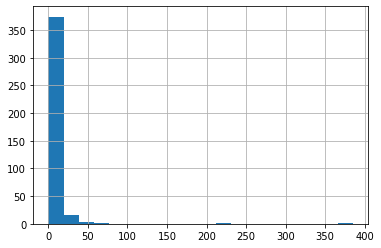

In [92]:
df.absences.hist(bins=20)
df.absences.describe()

Видим, что основное распределение лежит между 0 и 20 пропущенными занятиями и есть потенциальные выбросы свыше 20.
Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния (межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок

In [93]:
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


Удалим выбросы из датасета

In [94]:
df = df.loc[df.absences <= 20.0]

Рассмотрим столбец score.

Заменим незаполненные ячейки на 0.0. т.к. не понятно по какой причине нет показателей

In [95]:
df.score = df.score.fillna(0.0)

count    378.000000
mean      51.402116
std       23.803287
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

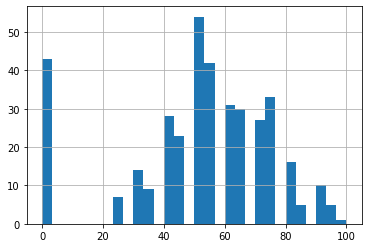

In [96]:
df.score.hist(bins=30)
df.score.describe()

Из распределния видно выбросов нет. Есть часть учеников, у которых оценка 0. Это может значить что ученики например не пришли на экзамен. 

In [97]:
IQR = df.score.quantile(0.75) - df.score.quantile(0.25)
perc25 = df.score.quantile(0.25)
perc75 = df.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


Удалим все строчки с 0.0 значением, т.к. это означает, что ученики например не пришли на экзамен. И в итоговом анализе мы этих ученников не рассматриваем

In [98]:
df = df.loc[df.score != 0.0]

Выясним, какие столбцы коррелируют с баллами по госэкзамену по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. Создадим новый df с интересующими нас столбцами age, absences, score.

In [99]:
df_new = df.loc[:, ['age', 'absences', 'score']]

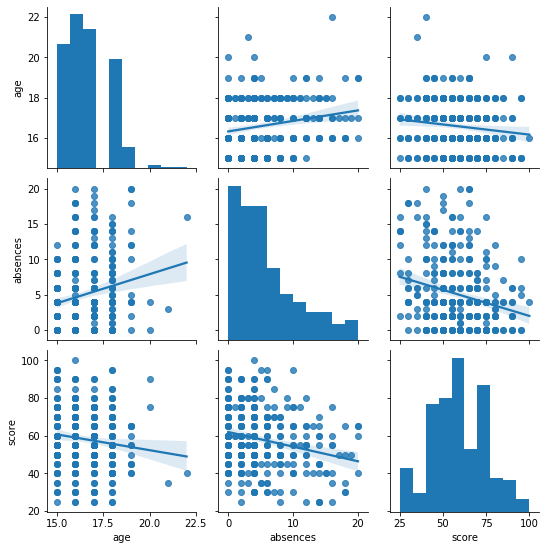

In [100]:
sns.pairplot(df_new, kind='reg')

Используем для наглядности матрицу корреляций:

In [101]:
df_new.corr()

,age,absences,score
age,1.000000,0.207215,-0.129999
absences,0.207215,1.000000,-0.239995
score,-0.129999,-0.239995,1.000000


Столбцы age и absences слабо скоррелированы друг с другом. Отрицательная корреляция их со столбцом score говорит о том что чем больше возраст ученика или больше пропущенных уроков, тем результат хуже

Рассмотрим остальные переменные с помощью box-plot

In [102]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:5])],
                ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()

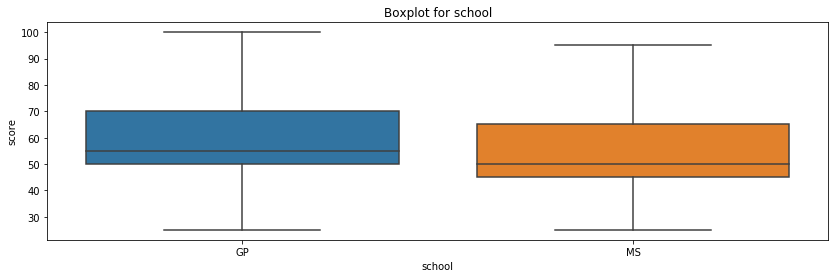

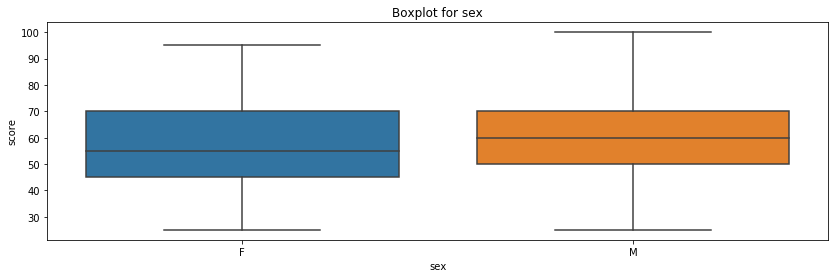

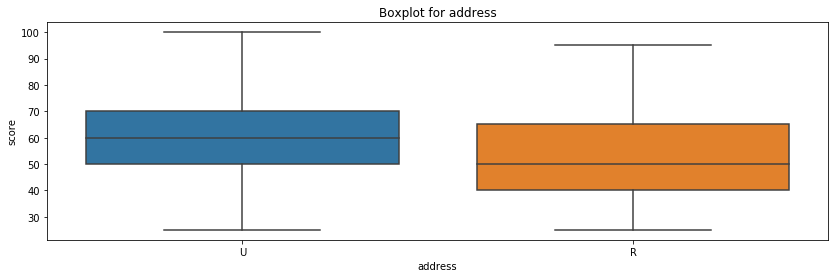

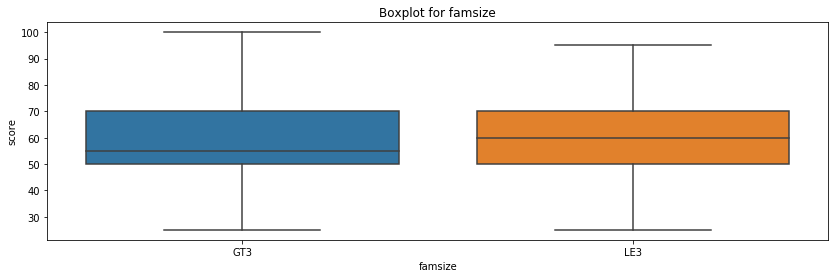

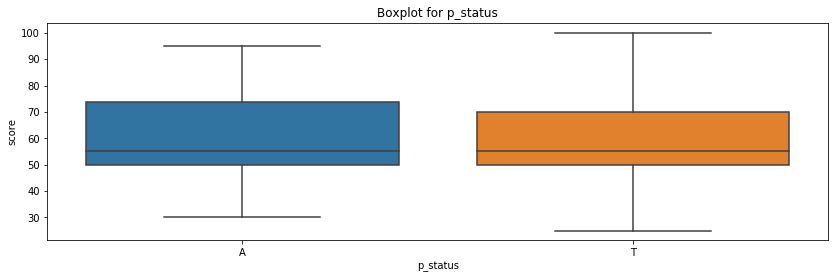

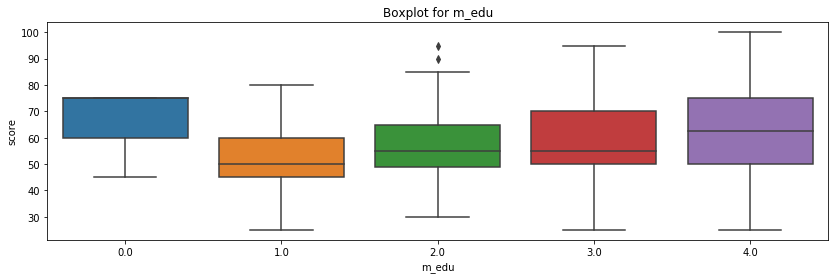

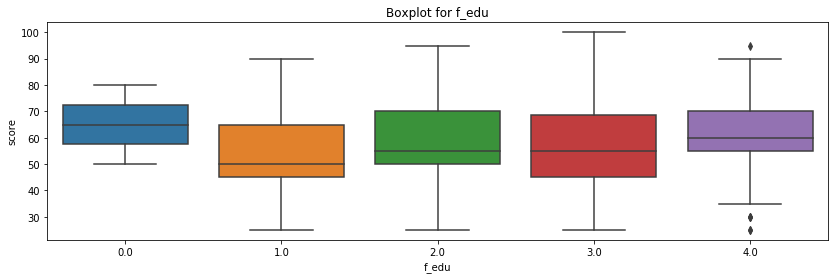

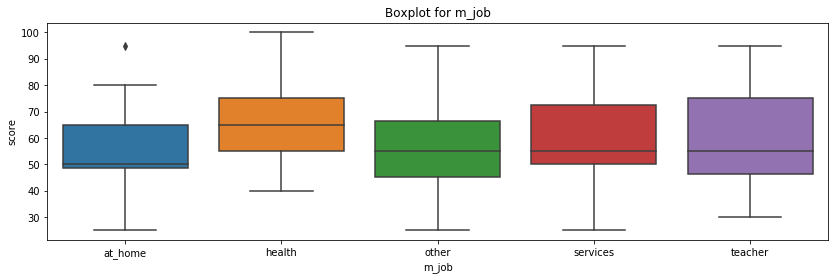

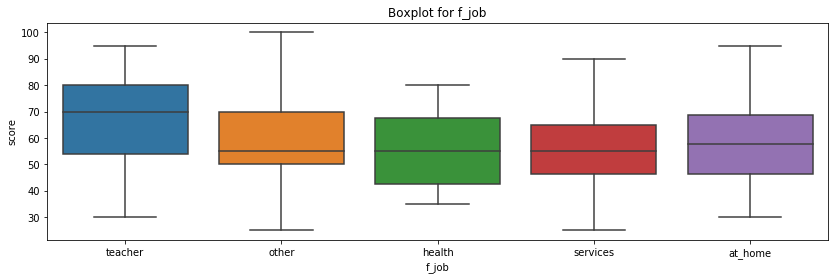

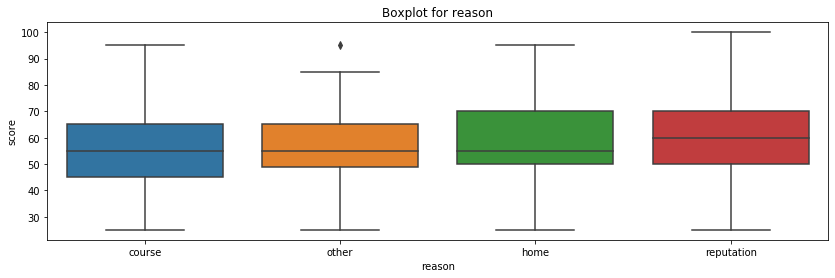

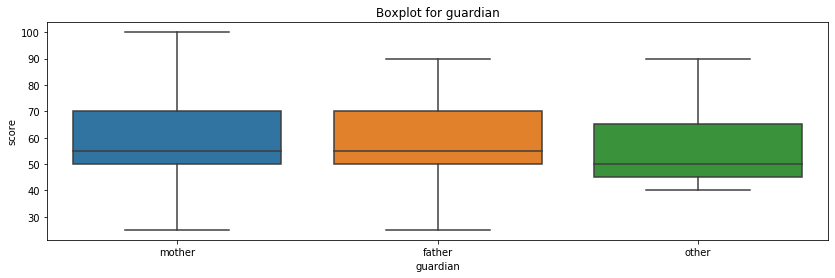

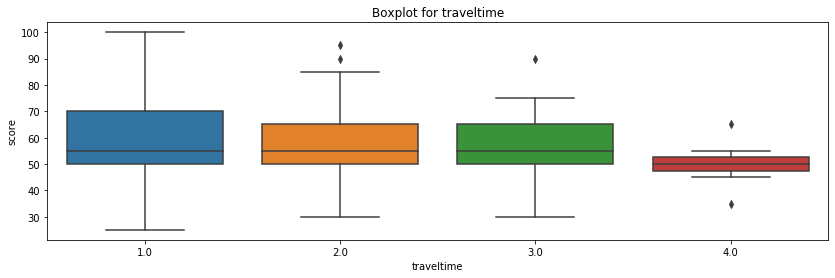

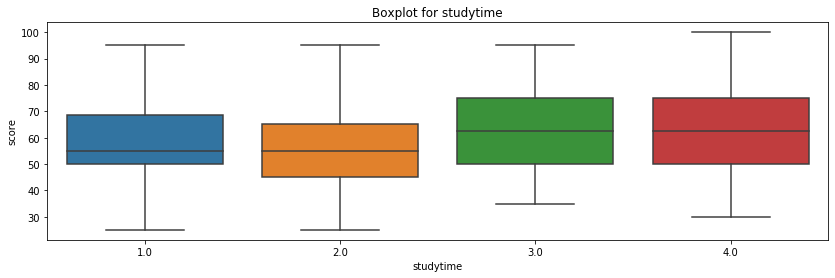

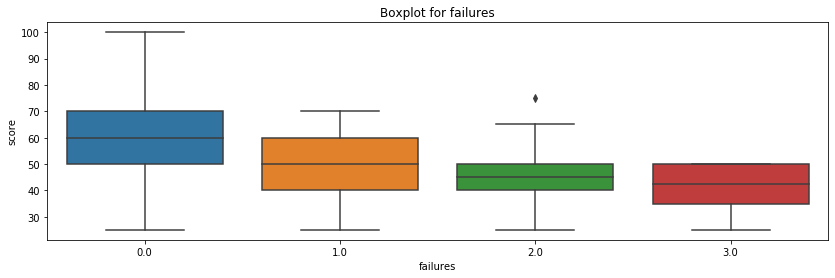

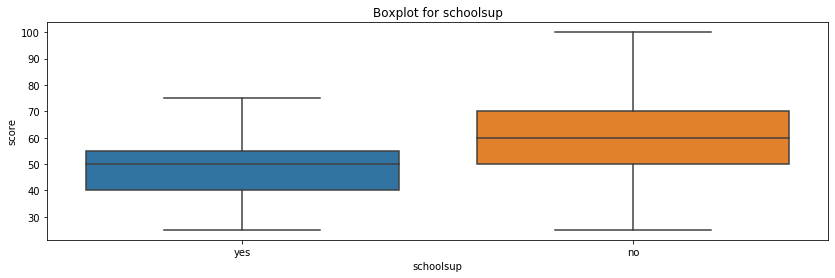

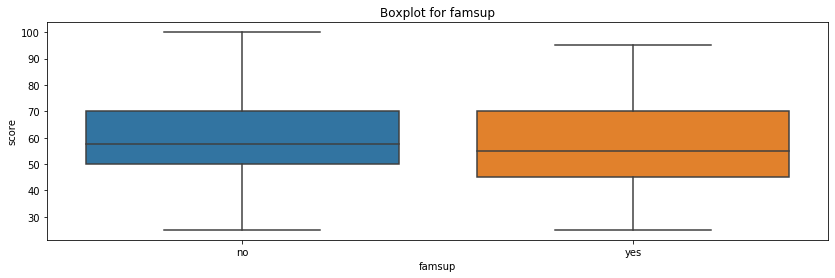

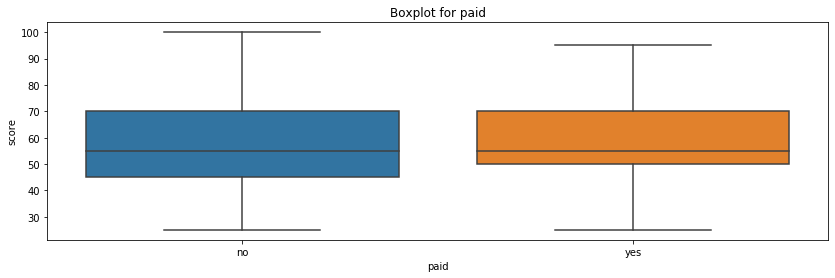

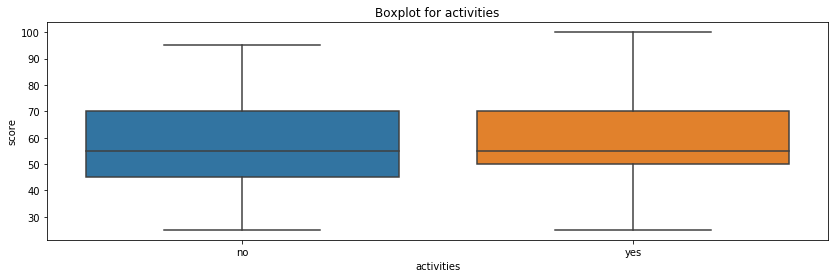

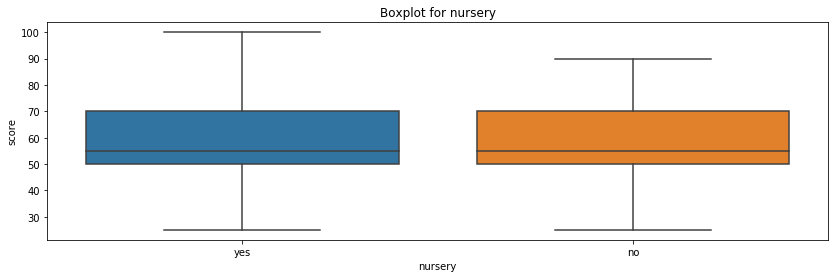

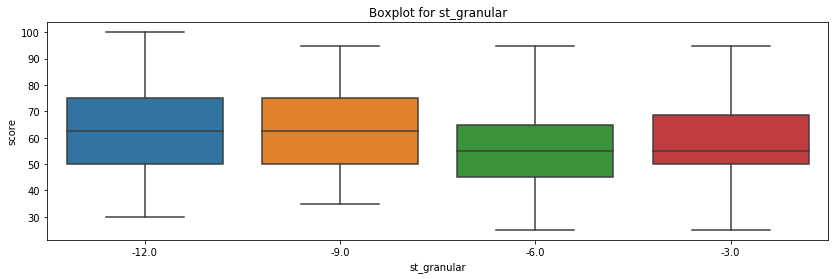

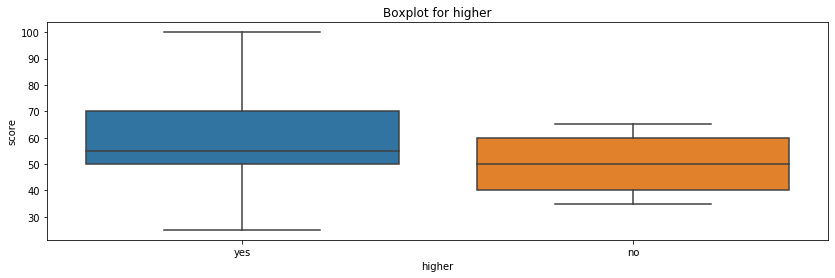

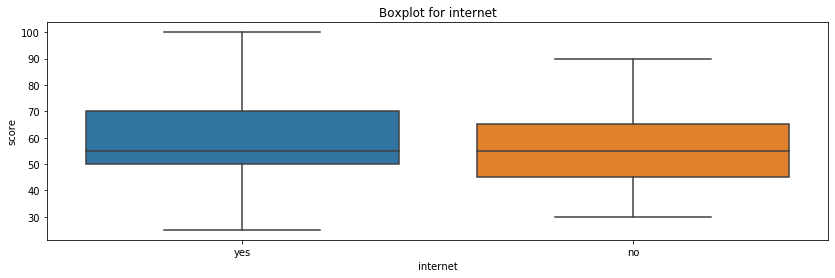

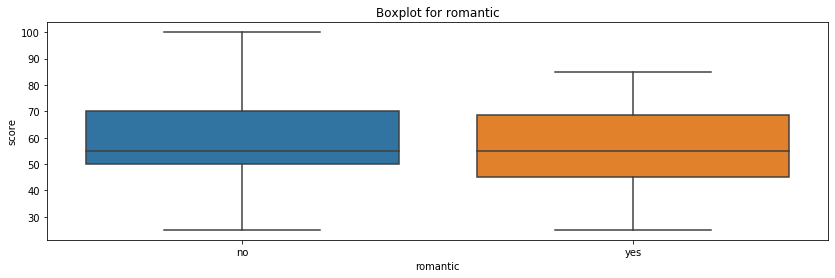

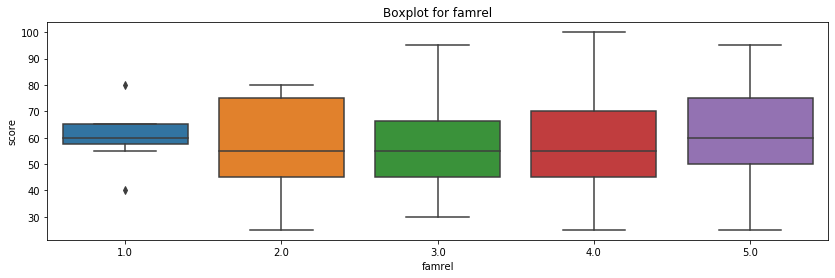

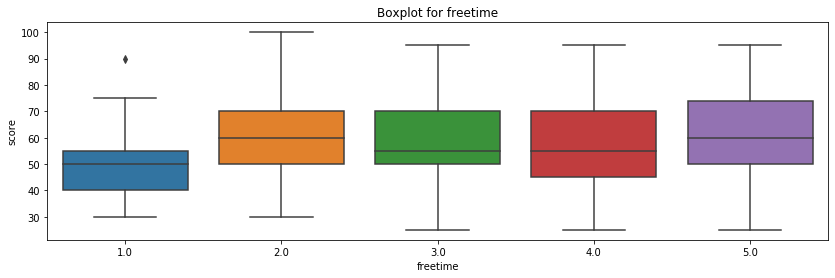

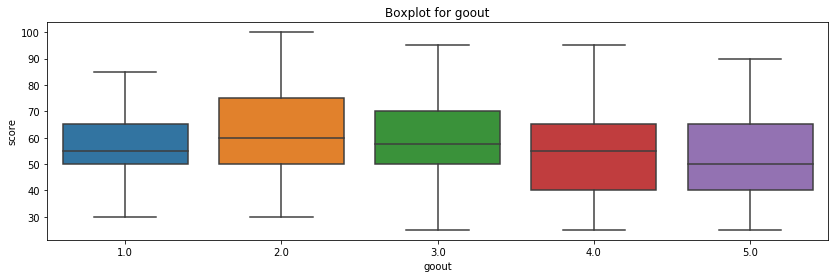

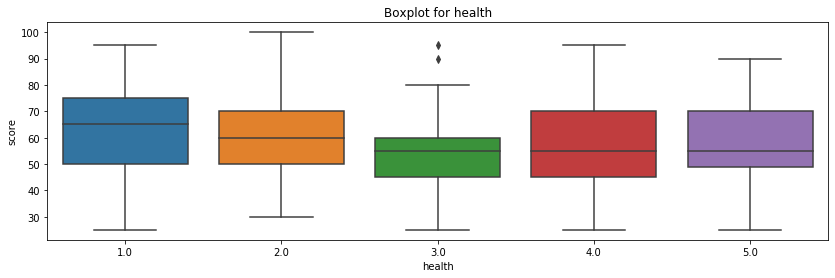

In [103]:
for col in ['school', 'sex', 'address', 'famsize', 'p_status', 'm_edu', 'f_edu', 'm_job', 'f_job', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'st_granular',
            'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

Из графиков видно, что некоторые параметры могут не влиять на успеваемость учеников. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [104]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [105]:
for col in ['school', 'sex', 'address', 'famsize', 'p_status', 'm_edu', 'f_edu', 'm_job', 'f_job', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'st_granular',
            'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки f_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки st_granular
Найдены статистически значимые различия для колонки health


Как мы видим, серьёзно отличаются 10 параметров: sex, address, m_edu, f_edu, m_job, studytime, failures, schoolsup, st_granular, health. Оставим эти переменные в датасете для дальнейшего построения модели, кроме колнки st_granular, как говорилось выше столбец st_granular это тот же самый парметр как и studytime, только умноженный на (-3). Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: sex, address, m_edu, f_edu, m_job, studytime, failures, schoolsup, health, age, absences, score.

In [106]:
df_for_model = df.loc[:, ['sex', 'address', 'm_edu', 'f_edu', 'm_job',
                          'studytime', 'failures', 'schoolsup', 'health', 'age', 'absences', 'score']]
df_for_model.head()

,sex,address,m_edu,f_edu,m_job,studytime,failures,schoolsup,health,age,absences,score
0,F,U,4.0,4.0,at_home,2.0,0.0,yes,3.0,18,6.0,30.0
1,F,U,1.0,1.0,at_home,2.0,0.0,no,3.0,17,4.0,30.0
2,F,U,1.0,1.0,at_home,2.0,3.0,yes,3.0,15,10.0,50.0
3,F,U,4.0,2.0,health,3.0,0.0,no,5.0,15,2.0,75.0
4,F,U,3.0,3.0,other,2.0,0.0,no,5.0,16,4.0,50.0


Выводы:
- В данных достаточно мало пустых значений
- Выбросы найдены в столбце возраст, но данные не удалялись в соответствии с условием задания (отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет) и количество пропущенных занятий (т.к. понятно что чем больше пропущенных занаятий, тем хуже успеваемость), также удалены ученики с оценкой по экзамену "0". Возможно они не пришли или забыли сдать работу, что позволяет сделать вывод о том, что данные не достаточно чистые.
- Отрицательная корреляция age и absences со столбцом score говорит о том что чем больше возраст ученика или больше пропущенных уроков, тем результат хуже
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex, address, m_edu, f_edu, m_job, studytime, failures, schoolsup, health, age, absences, score. 